In [ ]:
# Mengimpor library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file="/content/drive/MyDrive/tweets.csv"

In [ ]:
# Membaca data set dari file CSV
df = pd.read_csv(file)


In [ ]:
# Menampilkan lima baris pertama dari data set
df.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [ ]:
# Menampilkan informasi dasar dari data set, seperti jumlah baris, kolom, tipe data, dan nilai yang hilang
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


In [ ]:
# Menampilkan statistik deskriptif dari data set, seperti mean, median, standar deviasi, kuartil, dan lain-lain
df.describe()

,id,target
count,11370.000000,11370.000000
mean,5684.500000,0.185928
std,3282.380615,0.389066
min,0.000000,0.000000
25%,2842.250000,0.000000
50%,5684.500000,0.000000
75%,8526.750000,0.000000
max,11369.000000,1.000000


In [ ]:
# Menampilkan jumlah tweet per lokasi
df["location"].value_counts()

United States              96
Australia                  83
London, England            81
UK                         77
India                      74
                           ..
Great State of Texas        1
Karatina, Kenya             1
The internet or the gym     1
Reston, VA                  1
auroraborealis              1
Name: location, Length: 4504, dtype: int64

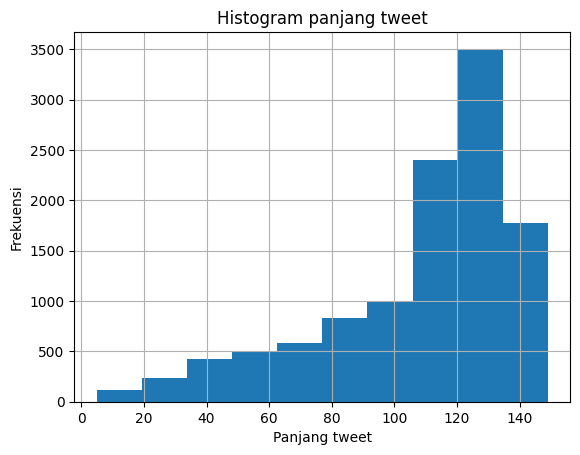

In [ ]:
# Membuat histogram dari panjang tweet
df["text"].str.len().hist()
plt.xlabel("Panjang tweet")
plt.ylabel("Frekuensi")
plt.title("Histogram panjang tweet")
plt.show()

In [ ]:
import re


In [ ]:
# Menampilkan persentase tweet yang mengandung emoji
def contains_emoji(text):
  # Fungsi ini mengembalikan True jika teks mengandung emoji, dan False jika tidak
  # Sumber: https://stackoverflow.com/questions/43146528/how-to-extract-all-the-emojis-from-text
  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
  return bool(emoji_pattern.search(text))

df["text"].apply(contains_emoji).mean() * 100

6.7985927880386985

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2349 (\N{DEVANAGARI LETTER BHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

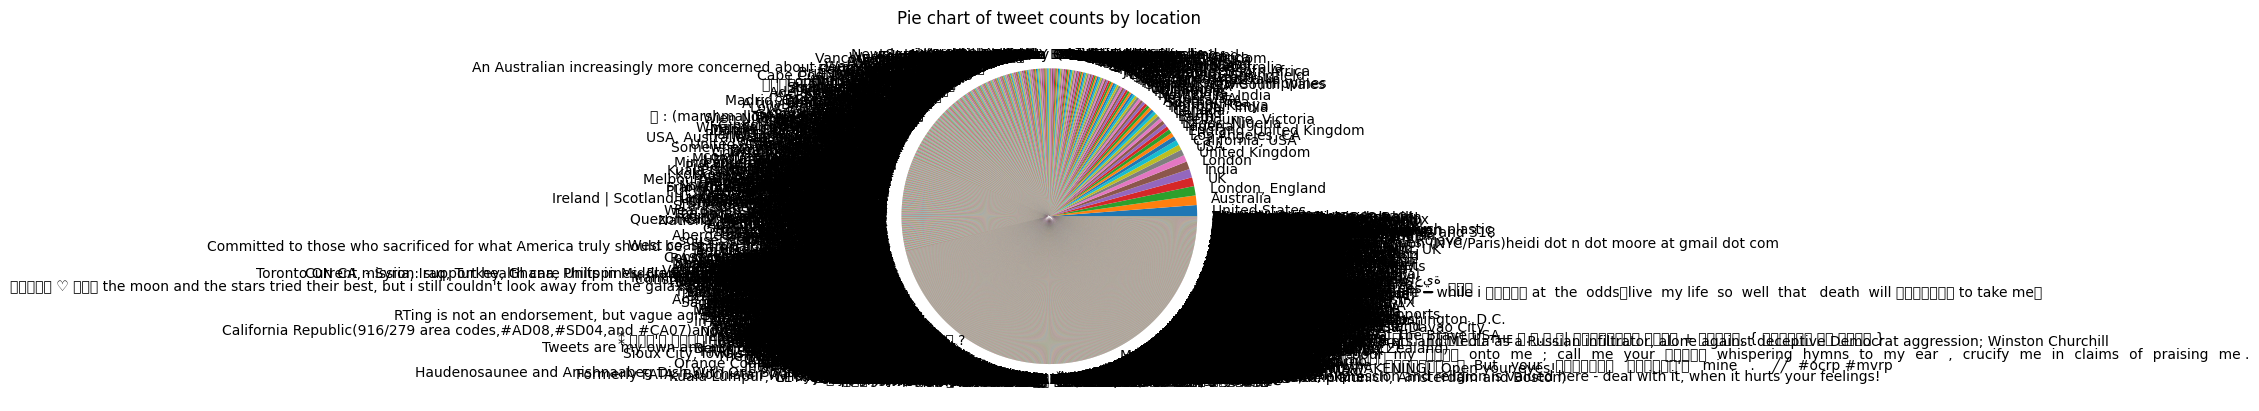

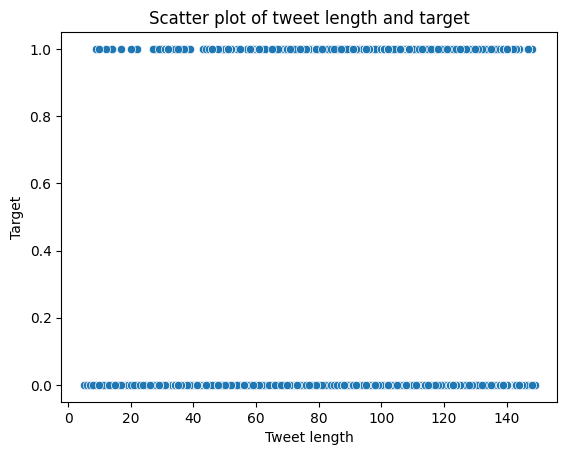

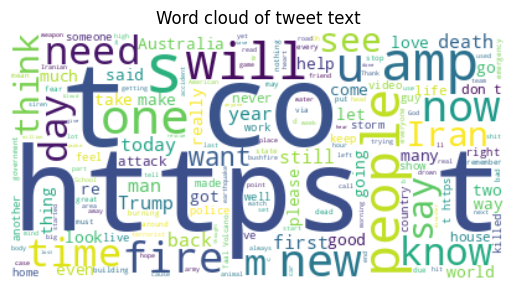

In [ ]:
# Mengimpor library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import wordcloud


# Membuat pie chart dari jumlah tweet per lokasi
df["location"].value_counts().plot.pie()
plt.title("Pie chart of tweet counts by location")
plt.show()

# Membuat scatter plot dari panjang tweet dan target
sns.scatterplot(x=df["text"].str.len(), y=df["target"])
plt.xlabel("Tweet length")
plt.ylabel("Target")
plt.title("Scatter plot of tweet length and target")
plt.show()

# Membuat word cloud dari teks tweet
text = " ".join(df["text"])
wc = wordcloud.WordCloud(background_color="white").generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word cloud of tweet text")
plt.show()

# Membuat histogram interaktif dari panjang tweet dengan plotly
fig = px.histogram(df, x=df["text"].str.len(), title="Interactive histogram of tweet length")
fig.show()


In [ ]:
# Importing the required libraries
import pandas as pd
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Cleaning the text from emojis, punctuation, and other unnecessary characters
def clean_text(text):
    # Removing emojis
    text = text.encode("ascii", "ignore").decode("ascii")
    # Removing punctuation and other characters
    text = "".join([c for c in text if c.isalnum() or c == " "])
    # Converting to lowercase and removing extra spaces
    text = text.lower().strip()
    return text

df["text"] = df["text"].apply(clean_text)



In [ ]:
# Performing tokenization, which is splitting the text into words
def tokenize_text(text):
    # Splitting the text by spaces
    tokens = text.split()
    return tokens

df["tokens"] = df["text"].apply(tokenize_text)


In [ ]:
# Performing stemming, which is changing words to their base forms
def stem_text(tokens):
    # Initializing the Porter stemmer
    stemmer = PorterStemmer()
    # Stemming each token
    stems = [stemmer.stem(token) for token in tokens]
    return stems

df["stems"] = df["tokens"].apply(stem_text)


In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('vader_lexicon')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Performing lemmatization, which is changing words to their dictionary forms
def lemmatize_text(tokens):
    # Initializing the WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()
    # Lemmatizing each token
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmas

df["lemmas"] = df["tokens"].apply(lemmatize_text)



In [ ]:
# Performing sentiment analysis, which is determining whether the text is positive, negative, or neutral
def analyze_sentiment(text):
    # Initializing the VADER sentiment analyzer
    sia = SentimentIntensityAnalyzer()
    # Getting the sentiment scores
    scores = sia.polarity_scores(text)
    # Getting the compound score
    compound = scores["compound"]
    # Assigning a label based on the compound score
    if compound >= 0.05:
        label = "Positive"
    elif compound <= -0.05:
        label = "Negative"
    else:
        label = "Neutral"
    return label

df["sentiment"] = df["text"].apply(analyze_sentiment)


In [ ]:
# Performing topic modeling, which is finding the main topics in the text
def model_topics(texts, n_topics):
    # Initializing the count vectorizer
    cv = CountVectorizer(max_df=0.95, min_df=2, stop_words="english")
    # Transforming the texts into a document-term matrix
    dtm = cv.fit_transform(texts)
    # Initializing the LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    # Fitting the LDA model to the document-term matrix
    lda.fit(dtm)
     # Getting the words and topics
    words = cv.get_feature_names_out()
    topics = lda.components_
    # Printing the top 10 words for each topic
    for i, topic in enumerate(topics):
        print(f"Topic {i+1}:")
        print([words[j] for j in topic.argsort()[-10:]])
        print("\n")

model_topics(df["text"], 5)

Topic 1:
['people', 'iran', 'time', 'got', 'dont', 'im', 'need', 'just', 'amp', 'like']


Topic 2:
['volcano', 'derailment', 'day', 'taal', 'party', 'morning', 'years', 'train', 'amp', 'heart']


Topic 3:
['amp', 'said', 'right', 'iran', 'burning', 'time', 'trump', 'nuclear', 'just', 'people']


Topic 4:
['volcano', 'youre', 'dont', 'today', 'know', 'amp', 'people', 'just', 'like', 'im']


Topic 5:
['dont', 'bus', 'power', 'death', 'want', 'china', 'new', 'just', 'body', 'storm']




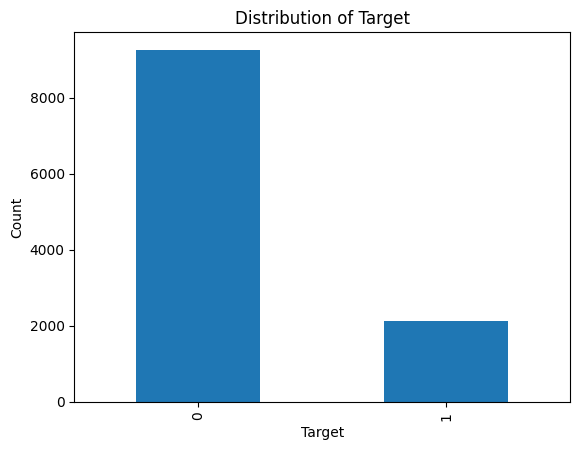

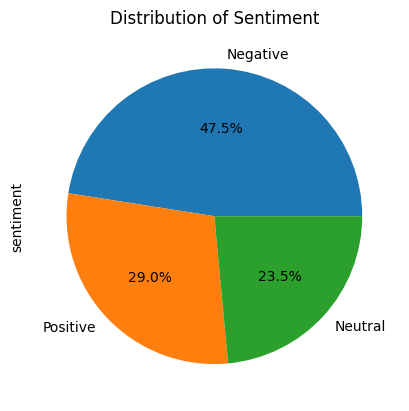

In [ ]:
# Creating visualizations, which are displaying graphs or diagrams that illustrate the data
# Plotting the distribution of target
df["target"].value_counts().plot(kind="bar")
plt.title("Distribution of Target")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

# Plotting the distribution of sentiment
df["sentiment"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution of Sentiment")
plt.show()

In [ ]:
df.head()

,id,keyword,location,text,target,tokens,stems,lemmas,sentiment
0,0,ablaze,NaN,communal violence in bhainsa telangana stones ...,1,"[communal, violence, in, bhainsa, telangana, s...","[commun, violenc, in, bhainsa, telangana, ston...","[communal, violence, in, bhainsa, telangana, s...",Negative
1,1,ablaze,NaN,telangana section 144 has been imposed in bhai...,1,"[telangana, section, 144, has, been, imposed, ...","[telangana, section, 144, ha, been, impos, in,...","[telangana, section, 144, ha, been, imposed, i...",Negative
2,2,ablaze,New York City,arsonist sets cars ablaze at dealership httpst...,1,"[arsonist, sets, cars, ablaze, at, dealership,...","[arsonist, set, car, ablaz, at, dealership, ht...","[arsonist, set, car, ablaze, at, dealership, h...",Neutral
3,3,ablaze,"Morgantown, WV",arsonist sets cars ablaze at dealership httpst...,1,"[arsonist, sets, cars, ablaze, at, dealership,...","[arsonist, set, car, ablaz, at, dealership, ht...","[arsonist, set, car, ablaze, at, dealership, h...",Neutral
4,4,ablaze,NaN,lord jesus your love brings freedom and pardon...,0,"[lord, jesus, your, love, brings, freedom, and...","[lord, jesu, your, love, bring, freedom, and, ...","[lord, jesus, your, love, brings, freedom, and...",Positive


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score, classification_report

# # Assuming "target" is the column you want to predict, and it's either "Positive", "Negative", or "Neutral"
# target_variable = "target"

# # Splitting the dataset into training and testing sets
# train_data, test_data, train_target, test_target = train_test_split(
#     df["text"], df[target_variable], test_size=0.2, random_state=42
# )

# # Creating a TF-IDF vectorizer
# tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words="english")

# # Transforming the training data
# X_train = tfidf_vectorizer.fit_transform(train_data)

# # Transforming the testing data
# X_test = tfidf_vectorizer.transform(test_data)

# # Creating a Multinomial Naive Bayes classifier
# naive_bayes_classifier = MultinomialNB()

# # Training the classifier
# naive_bayes_classifier.fit(X_train, train_target)

# # Making predictions on the testing set
# predictions = naive_bayes_classifier.predict(X_test)

# # Calculating accuracy
# accuracy = accuracy_score(test_target, predictions)
# print(f"Accuracy: {accuracy:.2%}")

# # Displaying classification report
# print("Classification Report:")
# print(classification_report(test_target, predictions))


In [ ]:
# # Melihat beberapa baris pertama dari dataset yang telah dimodifikasi
# print("Dataset setelah dimodifikasi:")
# print(df.head())


In [ ]:
# # Melihat beberapa baris pertama dari kolom-kolom tertentu
# print("Kolom tertentu dari dataset setelah dimodifikasi:")
# print(df[["text", "tokens", "stems", "lemmas", "sentiment", "target"]].head())


In [ ]:
# print(accuracy)

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC
# from sklearn.metrics import accuracy_score, classification_report

# # Assuming "target" is the column you want to predict, and it's either "Positive", "Negative", or "Neutral"
# target_variable = "target"

# # Splitting the dataset into training and testing sets
# train_data, test_data, train_target, test_target = train_test_split(
#     df["text"], df[target_variable], test_size=0.2, random_state=42
# )

# # Creating a TF-IDF vectorizer
# tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words="english")

# # Transforming the training data
# X_train = tfidf_vectorizer.fit_transform(train_data)

# # Transforming the testing data
# X_test = tfidf_vectorizer.transform(test_data)

# # Creating a Support Vector Machine (SVM) classifier
# svm_classifier = LinearSVC()

# # Training the classifier
# svm_classifier.fit(X_train, train_target)

# # Making predictions on the testing set
# predictions = svm_classifier.predict(X_test)

# # Calculating accuracy
# accuracy = accuracy_score(test_target, predictions)
# print(f"Accuracy: {accuracy:.2%}")

# # Displaying classification report
# print("Classification Report:")
# print(classification_report(test_target, predictions))


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Assuming "target" is the column you want to predict, and it's either "Positive", "Negative", or "Neutral"
# target_variable = "target"

# # Splitting the dataset into training and testing sets
# train_data, test_data, train_target, test_target = train_test_split(
#     df["text"], df[target_variable], test_size=0.2, random_state=42
# )

# # Creating a TF-IDF vectorizer
# tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words="english")

# # Transforming the training data
# X_train = tfidf_vectorizer.fit_transform(train_data)

# # Transforming the testing data
# X_test = tfidf_vectorizer.transform(test_data)

# # Creating a Random Forest classifier
# random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# # Training the classifier
# random_forest_classifier.fit(X_train, train_target)

# # Making predictions on the testing set
# predictions = random_forest_classifier.predict(X_test)

# # Calculating accuracy
# accuracy = accuracy_score(test_target, predictions)
# print(f"Accuracy: {accuracy:.2%}")

# # Displaying classification report
# print("Classification Report:")
# print(classification_report(test_target, predictions))


In [ ]:
target_variable = "sentiment"


In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi training set dan combined set (yang nantinya akan dibagi menjadi validation dan test)
train_data, combined_data, train_target, combined_target = train_test_split(
    df["text"], df[target_variable], test_size=0.4, random_state=42
)

# Memisahkan combined set menjadi validation set dan test set
validation_data, test_data, validation_target, test_target = train_test_split(
    combined_data, combined_target, test_size=0.5, random_state=42
)

# Sekarang, Anda memiliki train_data, validation_data, dan test_data sebagai input, dan
# train_target, validation_target, dan test_target sebagai output/target yang sesuai


In [ ]:
# from sklearn.svm import LinearSVC
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics import accuracy_score, classification_report

# # Membuat TF-IDF vectorizer
# tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words="english")

# # Transformasi training data
# X_train = tfidf_vectorizer.fit_transform(train_data)

# # Membuat model SVM
# svm_classifier = LinearSVC()
# #
# # Melatih model pada training set
# svm_classifier.fit(X_train, train_target)


LinearSVC()

In [ ]:
# # Transformasi test data
# X_test = tfidf_vectorizer.transform(test_data)

# # Membuat prediksi pada test set
# predictions = svm_classifier.predict(X_test)

# # Menghitung akurasi
# accuracy = accuracy_score(test_target, predictions)
# print(f"Accuracy: {accuracy:.2%}")

# # Menampilkan classification report
# print("Classification Report:")
# print(classification_report(test_target, predictions))


Accuracy: 70.76%
Classification Report:
              precision    recall  f1-score   support

    Negative       0.76      0.78      0.77      1091
     Neutral       0.60      0.64      0.62       511
    Positive       0.71      0.64      0.67       672

    accuracy                           0.71      2274
   macro avg       0.69      0.69      0.69      2274
weighted avg       0.71      0.71      0.71      2274



In [ ]:
# import numpy as np
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score, classification_report

# # Assuming "target" is the column you want to predict
# target_variable = "target"

# # Splitting the dataset into training and testing sets
# train_data, test_data, train_target, test_target = train_test_split(
#     df["text"], df[target_variable], test_size=0.2, random_state=42
# )

# # Creating a TF-IDF vectorizer
# tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words="english")

# # Transforming the training data
# X_train_sparse = tfidf_vectorizer.fit_transform(train_data)

# # Converting sparse matrix to dense numpy array
# X_train = X_train_sparse.toarray()

# # Transforming the testing data
# X_test = tfidf_vectorizer.transform(test_data).toarray()

# # Encoding the target variable
# label_encoder = LabelEncoder()
# y_train = label_encoder.fit_transform(train_target)
# y_test = label_encoder.transform(test_target)

# # Building a simple neural network with TensorFlow
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(3, activation='softmax')  # Assuming 3 classes: "Positive", "Negative", "Neutral"
# ])

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Training the model with epochs
# model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=32)

# # Evaluating the model on the test set
# predictions = model.predict(X_test)
# predicted_labels = np.argmax(predictions, axis=1)
# accuracy = accuracy_score(y_test, predicted_labels)
# print(f"Accuracy: {accuracy:.2%}")

# # Displaying classification report
# print("Classification Report:")
# print(classification_report(y_test, predicted_labels))


Epoch 1/10
256/256 [==============================] - 7s 19ms/step - loss: 0.6140 - accuracy: 0.8056 - val_loss: 0.4258 - val_accuracy: 0.8176
Epoch 2/10
256/256 [==============================] - 3s 11ms/step - loss: 0.3341 - accuracy: 0.8649 - val_loss: 0.3314 - val_accuracy: 0.8802
Epoch 3/10
256/256 [==============================] - 3s 12ms/step - loss: 0.2276 - accuracy: 0.9157 - val_loss: 0.3221 - val_accuracy: 0.8780
Epoch 4/10
256/256 [==============================] - 3s 12ms/step - loss: 0.1681 - accuracy: 0.9398 - val_loss: 0.3321 - val_accuracy: 0.8747
Epoch 5/10
256/256 [==============================] - 3s 13ms/step - loss: 0.1307 - accuracy: 0.9546 - val_loss: 0.3504 - val_accuracy: 0.8791
Epoch 6/10
256/256 [==============================] - 3s 10ms/step - loss: 0.0981 - accuracy: 0.9664 - val_loss: 0.3678 - val_accuracy: 0.8769
Epoch 7/10
256/256 [==============================] - 3s 11ms/step - loss: 0.0806 - accuracy: 0.9750 - val_loss: 0.3886 - val_accuracy: 0.8758

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming "target" is the column you want to predict
target_variable = "target"

# Splitting the dataset into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(
    df["text"], df[target_variable], test_size=0.2, random_state=42
)

# Tokenizing the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data)

# Converting text to sequences
X_train_sequences = tokenizer.texts_to_sequences(train_data)
X_test_sequences = tokenizer.texts_to_sequences(test_data)

# Padding sequences to ensure consistent length
X_train_padded = pad_sequences(X_train_sequences, padding='post', maxlen=100)
X_test_padded = pad_sequences(X_test_sequences, padding='post', maxlen=100)

# Encoding the target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_target)
y_test = label_encoder.transform(test_target)

# Building an LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=100),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')  # Assuming 3 classes: "Positive", "Negative", "Neutral"
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the LSTM model
history = model.fit(X_train_padded, y_train, epochs=5, validation_split=0.1, batch_size=32)

# Evaluating the model on the test set
predictions = model.predict(X_test_padded)
predicted_labels = tf.argmax(predictions, axis=1)
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy:.2%}")

# Displaying classification report
print("Classification Report:")
print(classification_report(y_test, predicted_labels))


Epoch 1/5
256/256 [==============================] - 28s 90ms/step - loss: 0.5333 - accuracy: 0.8099 - val_loss: 0.4998 - val_accuracy: 0.8066
Epoch 2/5
256/256 [==============================] - 23s 88ms/step - loss: 0.4958 - accuracy: 0.8116 - val_loss: 0.4917 - val_accuracy: 0.8066
Epoch 3/5
256/256 [==============================] - 21s 83ms/step - loss: 0.4894 - accuracy: 0.8116 - val_loss: 0.4914 - val_accuracy: 0.8066
Epoch 4/5
256/256 [==============================] - 21s 82ms/step - loss: 0.4907 - accuracy: 0.8116 - val_loss: 0.4914 - val_accuracy: 0.8066
Epoch 5/5
72/72 [==============================] - 1s 14ms/step
Accuracy: 82.59%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      1878
           1       0.00      0.00      0.00       396

    accuracy                           0.83      2274
   macro avg       0.41      0.50      0.45      2274
weighted avg       0.68      0.83      0.75      227

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# Menampilkan lima baris pertama dari data set
df.head()

,id,keyword,location,text,target,tokens,stems,lemmas,sentiment
0,0,ablaze,NaN,communal violence in bhainsa telangana stones ...,1,"[communal, violence, in, bhainsa, telangana, s...","[commun, violenc, in, bhainsa, telangana, ston...","[communal, violence, in, bhainsa, telangana, s...",Negative
1,1,ablaze,NaN,telangana section 144 has been imposed in bhai...,1,"[telangana, section, 144, has, been, imposed, ...","[telangana, section, 144, ha, been, impos, in,...","[telangana, section, 144, ha, been, imposed, i...",Negative
2,2,ablaze,New York City,arsonist sets cars ablaze at dealership httpst...,1,"[arsonist, sets, cars, ablaze, at, dealership,...","[arsonist, set, car, ablaz, at, dealership, ht...","[arsonist, set, car, ablaze, at, dealership, h...",Neutral
3,3,ablaze,"Morgantown, WV",arsonist sets cars ablaze at dealership httpst...,1,"[arsonist, sets, cars, ablaze, at, dealership,...","[arsonist, set, car, ablaz, at, dealership, ht...","[arsonist, set, car, ablaze, at, dealership, h...",Neutral
4,4,ablaze,NaN,lord jesus your love brings freedom and pardon...,0,"[lord, jesus, your, love, brings, freedom, and...","[lord, jesu, your, love, bring, freedom, and, ...","[lord, jesus, your, love, brings, freedom, and...",Positive


In [ ]:
# Menampilkan persentase tweet yang mengandung emoji
def contains_emoji(text):
  # Fungsi ini mengembalikan True jika teks mengandung emoji, dan False jika tidak
  # Sumber: https://stackoverflow.com/questions/43146528/how-to-extract-all-the-emojis-from-text
  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
  return bool(emoji_pattern.search(text))

df["text"].apply(contains_emoji).mean() * 100

0.0

In [ ]:
# Menampilkan jumlah tweet per lokasi
df["text"].value_counts()

0        communal violence in bhainsa telangana stones ...
1        telangana section 144 has been imposed in bhai...
2        arsonist sets cars ablaze at dealership httpst...
3        arsonist sets cars ablaze at dealership httpst...
4        lord jesus your love brings freedom and pardon...
                               ...                        
11365    media should have warned us well in advance th...
11366    i feel directly attacked  i consider moonbin a...
11367    i feel directly attacked  i consider moonbin a...
11368    ok who remember outcast nd the dora au those a...
11369        jake corway wrecked while running 14th at irp
Name: text, Length: 11370, dtype: object

In [ ]:
# Menampilkan jumlah tweet per lokasi
df["target"].value_counts()

0    9256
1    2114
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np

# Assuming "target" is the column you want to predict, and it's either "Positive", "Negative", or "Neutral"
target_variable = "target"

# Splitting the dataset into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(
    df["text"], df[target_variable], test_size=0.2, random_state=42
)

# Creating a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words="english")

# Transforming the training data
X_train = tfidf_vectorizer.fit_transform(train_data)

# Transforming the testing data
X_test = tfidf_vectorizer.transform(test_data)

# Label encoding the target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_target)
y_test = label_encoder.transform(test_target)

# Splitting the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Creating a simple neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(len(label_encoder.classes_), activation="softmax"))

# Compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid), verbose=1)

# Evaluating the model on the testing set
predictions = model.predict(X_test)
y_pred = predictions.argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Displaying classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


NameError: ignored